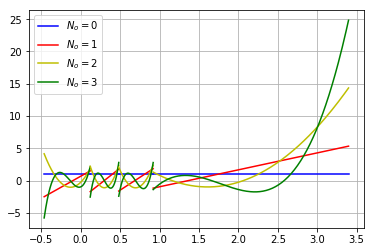

In [2]:
# creates and plot rescaled polynomial basis

# load pandas
import pandas as pd
# load numpy
import numpy as np
#import math
import matplotlib.pyplot as plt
import polytools as pt
import datatools as dt
#import wavetools as wt

# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')

# aPC method: 0 - Gautschi - style, 1- Sergey style / Karni & Kirby Book
method=1 
src=3
Nr=2
No=4
epts=1000
nNri=2**Nr
data=dataframe[src]
cl=['b-','r-','y-','g-','c-']
for Nri in range(nNri):
    lb,rb=dt.cmpLRB(Nr,Nri)
    qlb=data.quantile(lb)
    qrb=data.quantile(rb)
    #print(lb,rb,qlb,qrb)
    bd=dt.cmpQuantDomain(data,qlb,qrb)
    qdata=data[bd]
    #print(qdata.describe())
    cf=np.zeros([No,No])
    scf=np.zeros([No,No])
    gcf=np.zeros([No,No])
    ncf=np.zeros([No,No])
    H=pt.Hankel(No,qdata)
    r,w=pt.genRW(H,method)
    #print('H=',H)
    cf=pt.genPCmx(H,method)
    ncf=pt.genNPCmx(cf,r,w)
    for k in range(No):
        #print('H=',H)
        #nc=pt.cmpNormCf(cf[k,:],r,w)
        #ncf[k,:]=cf[k,:]/nc
        pcf=ncf[k,:]
        p=np.poly1d(np.flip(pcf,0))
        x=np.linspace(qlb,qrb,epts//nNri)
        y=p(x)
        #print('p.c.',p.c)
        if Nri==0:
            plt.plot(x,y,cl[k],label='$N_o=$'+str(k))
        else:
            plt.plot(x,y,cl[k])

    #print('(',src,',',Nri,'):\n',cf,'\n',ncf,'\n')
plt.grid(True)
plt.legend(loc='best')
plt.show()

